In [4]:
import glob
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import mplhep as hep
plt.style.use(hep.style.CMS)

import utils.file_info as finfo
finfo.XSECS_DB = {
    "ZJetsToQQ_HT-200to400": 1012.0,
    "ZJetsToQQ_HT-400to600": 114.2,
    "ZJetsToQQ_HT-600to800": 25.34,
    "ZJetsToQQ_HT-800toInf": 12.99,
    
    "WJetsToQQ_HT-200to400": 2549.0,
    "WJetsToQQ_HT-400to600": 276.5,
    "WJetsToQQ_HT-600to800": 59.25,
    "WJetsToQQ_HT-800toInf": 28.75,
    
    "QCD_HT50to100": 185300000,
    "QCD_HT100to200": 27849880,
    "QCD_HT200to300": 1716997,
    "QCD_HT300to500": 351302,
    "QCD_HT500to700": 31630,
    "QCD_HT700to1000": 6802,
    "QCD_HT1000to1500": 1206,
    "QCD_HT1500to2000": 98.71,
    "QCD_HT2000toInf": 20.2,
    
    "QCD_Pt_170to300": 104000.0,
    "QCD_Pt_300to470": 6806.0,
    "QCD_Pt_470to600": 552.0,
    "QCD_Pt_600to800": 154.6,
    "QCD_Pt_800to1000": 26.15,
    "QCD_Pt_1000to1400": 7.501,
    "QCD_Pt_1400to1800": 0.6419,
    "QCD_Pt_1800to2400": 0.0877,
    "QCD_Pt_2400to3200": 0.005241,
    "QCD_Pt_3200toInf": 0.0001346,
}

In [13]:
def plot_qcd(year, bins="pt"):
    fig, all_axes = plt.subplots(5, 2, figsize=(12, 60))
    print(all_axes)
    
    if bins == "ht":
        colors = {
            "HT50to100":    "#364b9a",
            "HT100to200":   "#e8eff6",
            "HT200to300":   "#6ea5cd",
            "HT300to500":   "#97cae1",
            "HT500to700":   "#c2e4ee",
            "HT700to1000":  "#eaeccc",
            "HT1000to1500": "#feda8a",
            "HT1500to2000": "#fdb366",
            "HT2000toInf":  "#f67e4b",
        }
    elif bins == "pt":
        colors = {
            "Pt_170to300":   "#364b9a",
            "Pt_300to470":   "#e8eff6",
            "Pt_470to600":   "#6ea5cd",
            "Pt_600to800":   "#97cae1",
            "Pt_800to1000":  "#c2e4ee",
            "Pt_1000to1400": "#eaeccc",
            "Pt_1400to1800": "#feda8a",
            "Pt_1800to2400": "#fdb366",
            "Pt_2400to3200": "#f67e4b",
            "Pt_3200toInf":  "#dd3c2d",
        }
    
    for qcd_file in glob.glob(f"/ceph/cms/store/user/jguiang/testfiles/QCD_{bins}-*{year}.root"):
        print(qcd_file)
        qcd_finfo = finfo.parse(qcd_file)
        # Open file and get/plot HT
        with uproot.open(qcd_file) as root_file:
            ht = ak.sum(root_file["Events"]["FIXME"].array(), axis=1) # TODO: figure out what to use for HT or pT
            for axes in [axes for lr_axes in all_axes for axes in lr_axes]:
                axes.hist(
                    ht, bins=np.linspace(300, 500, 41), 
                    weights=np.ones(len(ht))*qcd_finfo["xsec_sf"],
#                     color=colors[qcd_file.split("_")[1]]
                )
#             axes_UR.hist(
#                 ht, bins=np.linspace(500, 700, 41), 
#                 weights=np.ones(len(ht))*vjets_finfo["xsec_sf"],
#                 color=colors[vjets_file.split("_")[1]]
#             )
#             axes_DL.hist(
#                 ht, bins=np.linspace(700, 900, 41), 
#                 weights=np.ones(len(ht))*vjets_finfo["xsec_sf"],
#                 color=colors[vjets_file.split("_")[1]]
#             )
#             axes_DR.hist(
#                 ht, bins=np.linspace(0, 1000, 101), 
#                 weights=np.ones(len(ht))*vjets_finfo["xsec_sf"],
#                 color=colors[vjets_file.split("_")[1]]
#             )
            
        # Plot CMS label
        hep.cms.text(
            "Simulation Preliminary",
            loc=0,
            ax=axes_UL,
            fontsize=24
        );
        hep.cms.lumitext(
            str(round(vjets_finfo['lumi'], 1)) + r" fb$^{-1}$ (13 TeV)",
            ax=axes_UR,
            fontsize=24
        );

#     axes_UL.yaxis.set_major_formatter(ticker.FormatStrFormatter("%0.0e"));
#     axes_UL.tick_params(axis="both", labelsize=12);
#     axes_UR.yaxis.set_major_formatter(ticker.FormatStrFormatter("%0.0e"));
#     axes_UR.tick_params(axis="both", labelsize=12);
#     axes_DL.yaxis.set_major_formatter(ticker.FormatStrFormatter("%0.0e"));
#     axes_DL.tick_params(axis="both", labelsize=12);
        
#     axes_DR.set_yscale("log");
#     axes_UL.set_ylabel("Count");
#     axes_DR.set_xlabel(r"LHE $H_T$ [GeV]");
    
    

def plot_vjets_ht(year, V="Z"):

    fig, ((axes_UL, axes_UR), (axes_DL, axes_DR)) = plt.subplots(2, 2)
    
    if V == "W":
        colors = {
            "HT-200to400": "#364b9a",
            "HT-400to600": "#e8eff6",
            "HT-600to800": "#6ea5cd",
            "HT-800toInf": "#97cae1"
        }
    elif V == "Z":
        colors = {
            "HT-200to400": "#dd3c2d",
            "HT-400to600": "#f67e4b",
            "HT-600to800": "#fdb366",
            "HT-800toInf": "#feda8a"
        }
    else:
        return

    for vjets_file in glob.glob(f"/ceph/cms/store/user/jguiang/testfiles/{V}JetsToQQ_HT-*{year}.root"):
        print(vjets_file)
        vjets_finfo = finfo.parse(vjets_file)
        # Open file and get/plot HT
        with uproot.open(vjets_file) as root_file:
            ht = ak.sum(root_file["Events"]["LHEPart_pt"].array()[:,2:], axis=1)
            axes_UL.hist(
                ht, bins=np.linspace(300, 500, 41), 
                weights=np.ones(len(ht))*vjets_finfo["xsec_sf"],
                color=colors[vjets_file.split("_")[1]]
            )
            axes_UR.hist(
                ht, bins=np.linspace(500, 700, 41), 
                weights=np.ones(len(ht))*vjets_finfo["xsec_sf"],
                color=colors[vjets_file.split("_")[1]]
            )
            axes_DL.hist(
                ht, bins=np.linspace(700, 900, 41), 
                weights=np.ones(len(ht))*vjets_finfo["xsec_sf"],
                color=colors[vjets_file.split("_")[1]]
            )
            axes_DR.hist(
                ht, bins=np.linspace(0, 1000, 101), 
                weights=np.ones(len(ht))*vjets_finfo["xsec_sf"],
                color=colors[vjets_file.split("_")[1]]
            )
            
        # Plot CMS label
        hep.cms.text(
            "Simulation Preliminary",
            loc=0,
            ax=axes_UL,
            fontsize=24
        );
        hep.cms.lumitext(
            str(round(vjets_finfo['lumi'], 1)) + r" fb$^{-1}$ (13 TeV)",
            ax=axes_UR,
            fontsize=24
        );

    axes_UL.yaxis.set_major_formatter(ticker.FormatStrFormatter("%0.0e"));
    axes_UL.tick_params(axis="both", labelsize=12);
    axes_UR.yaxis.set_major_formatter(ticker.FormatStrFormatter("%0.0e"));
    axes_UR.tick_params(axis="both", labelsize=12);
    axes_DL.yaxis.set_major_formatter(ticker.FormatStrFormatter("%0.0e"));
    axes_DL.tick_params(axis="both", labelsize=12);
        
    axes_DR.set_yscale("log");
    axes_UL.set_ylabel("Count");
    axes_DR.set_xlabel(r"LHE $H_T$ [GeV]");

[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]


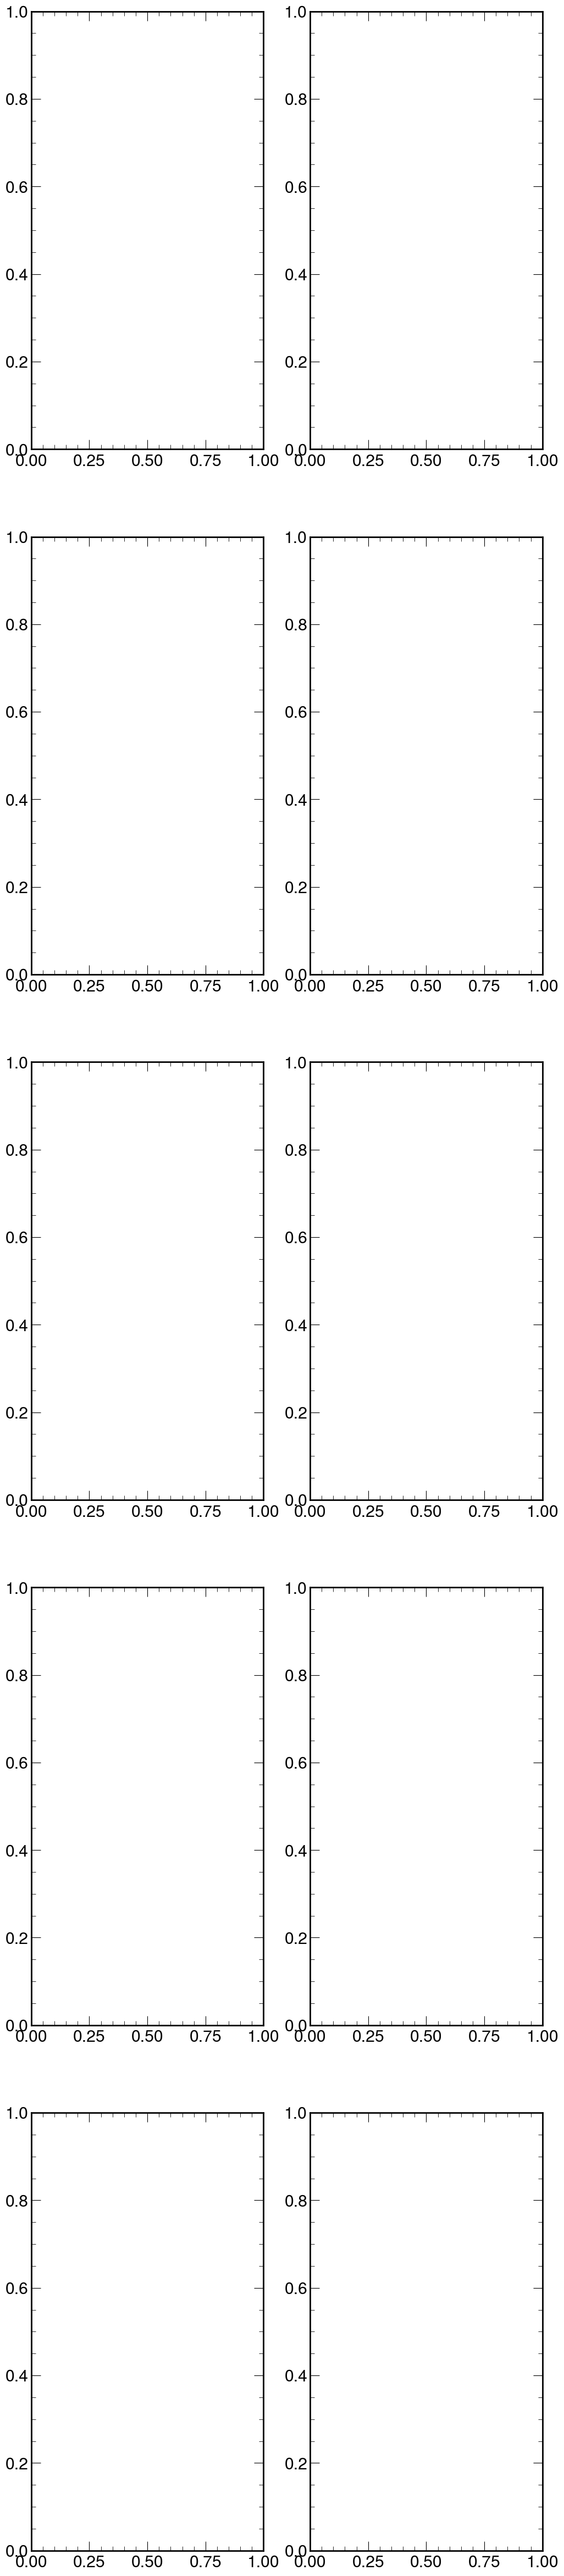

In [14]:
plot_qcd("RunIISummer20UL18NanoAODv9")

/ceph/cms/store/user/jguiang/testfiles/WJetsToQQ_HT-400to600_TuneCP5_13TeV-madgraphMLM-pythia8_RunIISummer20UL18NanoAODv9.root
/ceph/cms/store/user/jguiang/testfiles/WJetsToQQ_HT-200to400_TuneCP5_13TeV-madgraphMLM-pythia8_RunIISummer20UL18NanoAODv9.root
/ceph/cms/store/user/jguiang/testfiles/WJetsToQQ_HT-800toInf_TuneCP5_13TeV-madgraphMLM-pythia8_RunIISummer20UL18NanoAODv9.root
/ceph/cms/store/user/jguiang/testfiles/WJetsToQQ_HT-600to800_TuneCP5_13TeV-madgraphMLM-pythia8_RunIISummer20UL18NanoAODv9.root
/ceph/cms/store/user/jguiang/testfiles/WJetsToQQ_HT-600to800_TuneCP5_13TeV-madgraphMLM-pythia8_RunIISummer20UL17NanoAODv9.root
/ceph/cms/store/user/jguiang/testfiles/WJetsToQQ_HT-200to400_TuneCP5_13TeV-madgraphMLM-pythia8_RunIISummer20UL17NanoAODv9.root
/ceph/cms/store/user/jguiang/testfiles/WJetsToQQ_HT-800toInf_TuneCP5_13TeV-madgraphMLM-pythia8_RunIISummer20UL17NanoAODv9.root
/ceph/cms/store/user/jguiang/testfiles/WJetsToQQ_HT-400to600_TuneCP5_13TeV-madgraphMLM-pythia8_RunIISummer20UL1

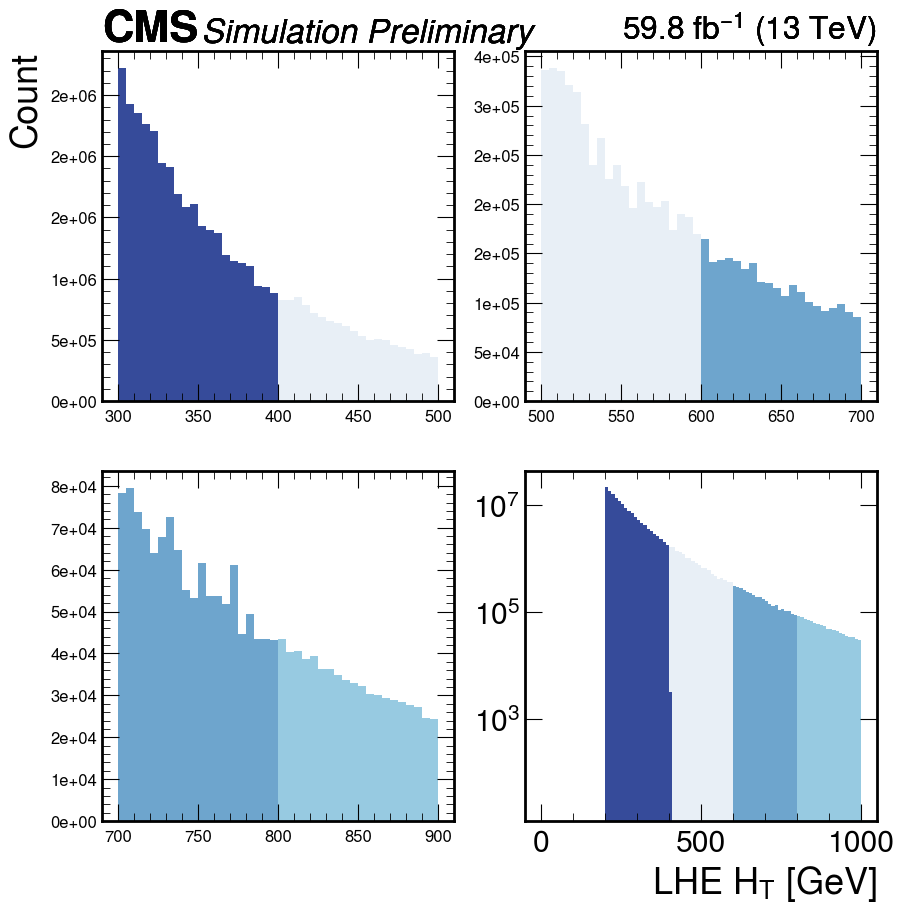

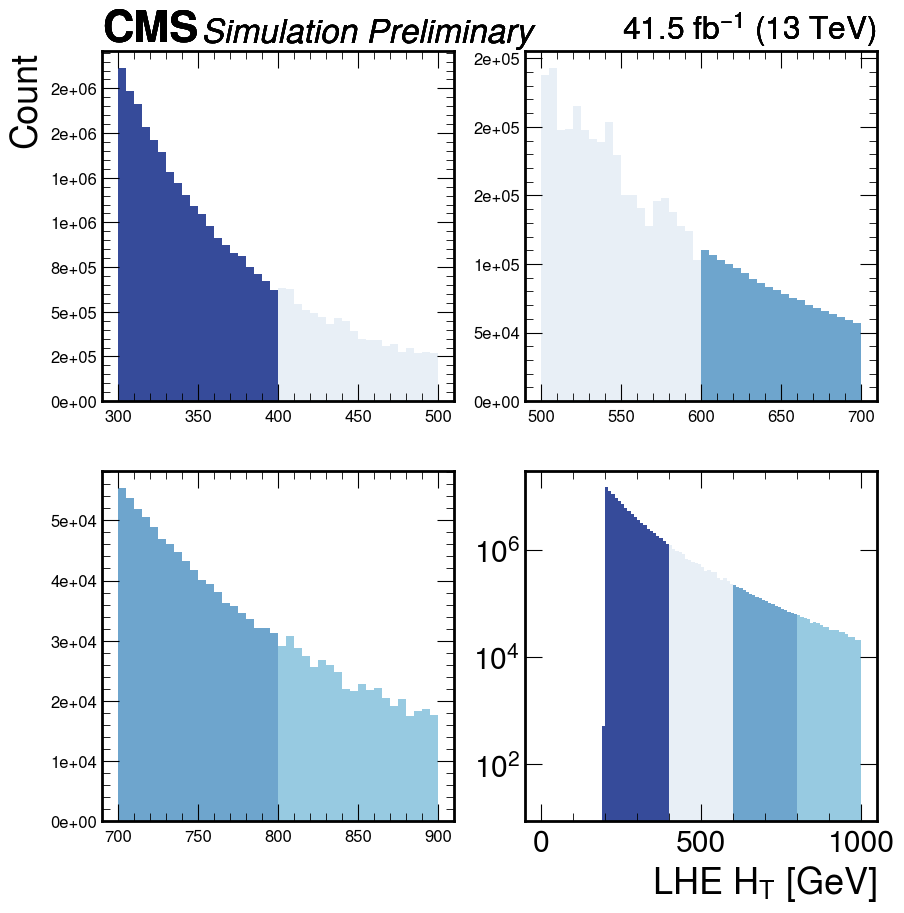

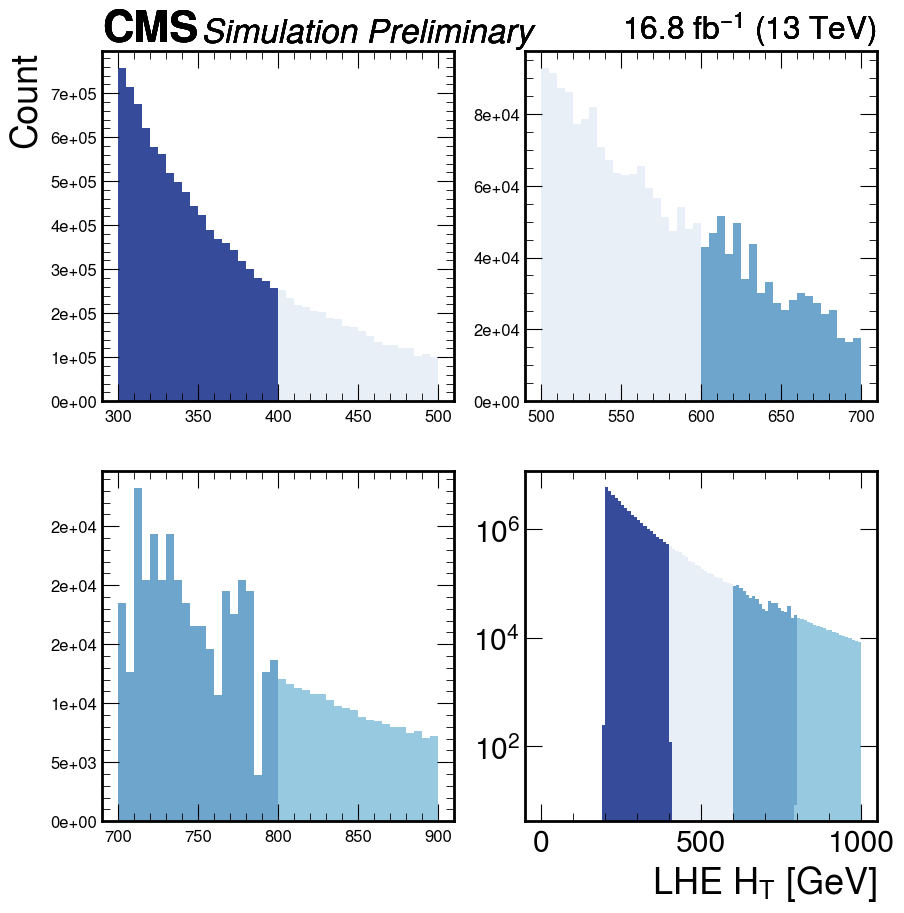

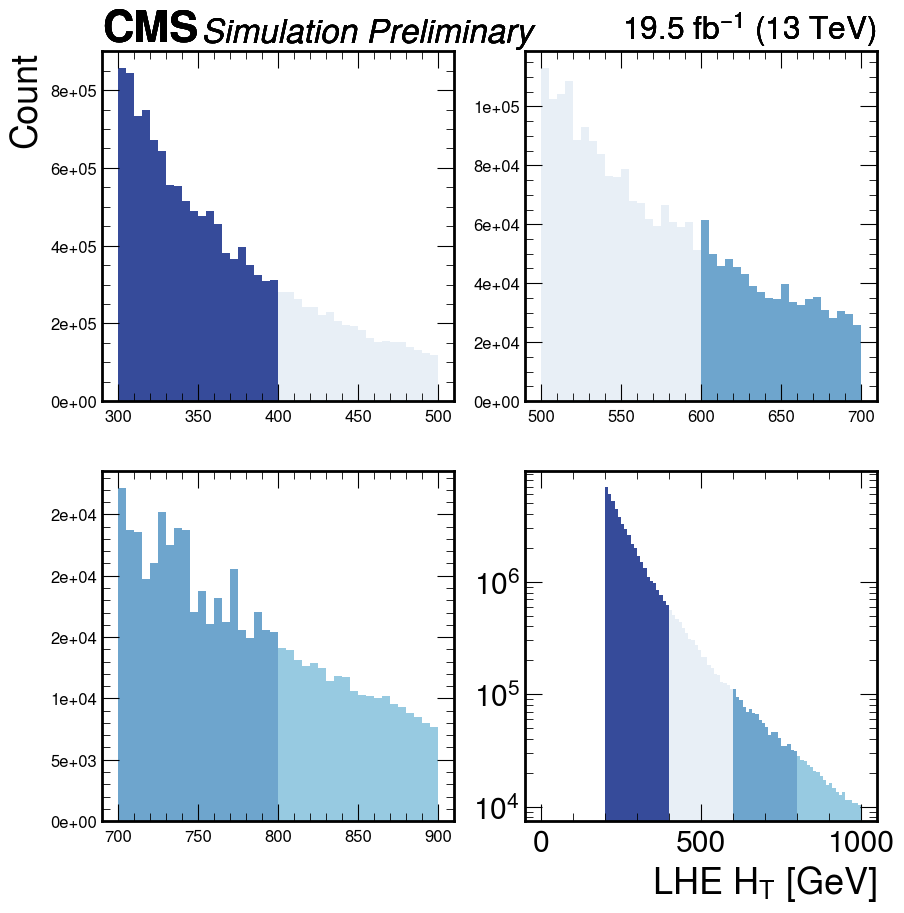

In [3]:
plot_vjets_ht("RunIISummer20UL18NanoAODv9", V="W")
plot_vjets_ht("RunIISummer20UL17NanoAODv9", V="W")
plot_vjets_ht("RunIISummer20UL16NanoAODv9", V="W")
plot_vjets_ht("RunIISummer20UL16NanoAODAPVv9", V="W")

/ceph/cms/store/user/jguiang/testfiles/ZJetsToQQ_HT-200to400_TuneCP5_13TeV-madgraphMLM-pythia8_RunIISummer20UL18NanoAODv9.root
/ceph/cms/store/user/jguiang/testfiles/ZJetsToQQ_HT-400to600_TuneCP5_13TeV-madgraphMLM-pythia8_RunIISummer20UL18NanoAODv9.root
/ceph/cms/store/user/jguiang/testfiles/ZJetsToQQ_HT-800toInf_TuneCP5_13TeV-madgraphMLM-pythia8_RunIISummer20UL18NanoAODv9.root
/ceph/cms/store/user/jguiang/testfiles/ZJetsToQQ_HT-600to800_TuneCP5_13TeV-madgraphMLM-pythia8_RunIISummer20UL18NanoAODv9.root
/ceph/cms/store/user/jguiang/testfiles/ZJetsToQQ_HT-600to800_TuneCP5_13TeV-madgraphMLM-pythia8_RunIISummer20UL17NanoAODv9.root
/ceph/cms/store/user/jguiang/testfiles/ZJetsToQQ_HT-200to400_TuneCP5_13TeV-madgraphMLM-pythia8_RunIISummer20UL17NanoAODv9.root
/ceph/cms/store/user/jguiang/testfiles/ZJetsToQQ_HT-400to600_TuneCP5_13TeV-madgraphMLM-pythia8_RunIISummer20UL17NanoAODv9.root
/ceph/cms/store/user/jguiang/testfiles/ZJetsToQQ_HT-800toInf_TuneCP5_13TeV-madgraphMLM-pythia8_RunIISummer20UL1

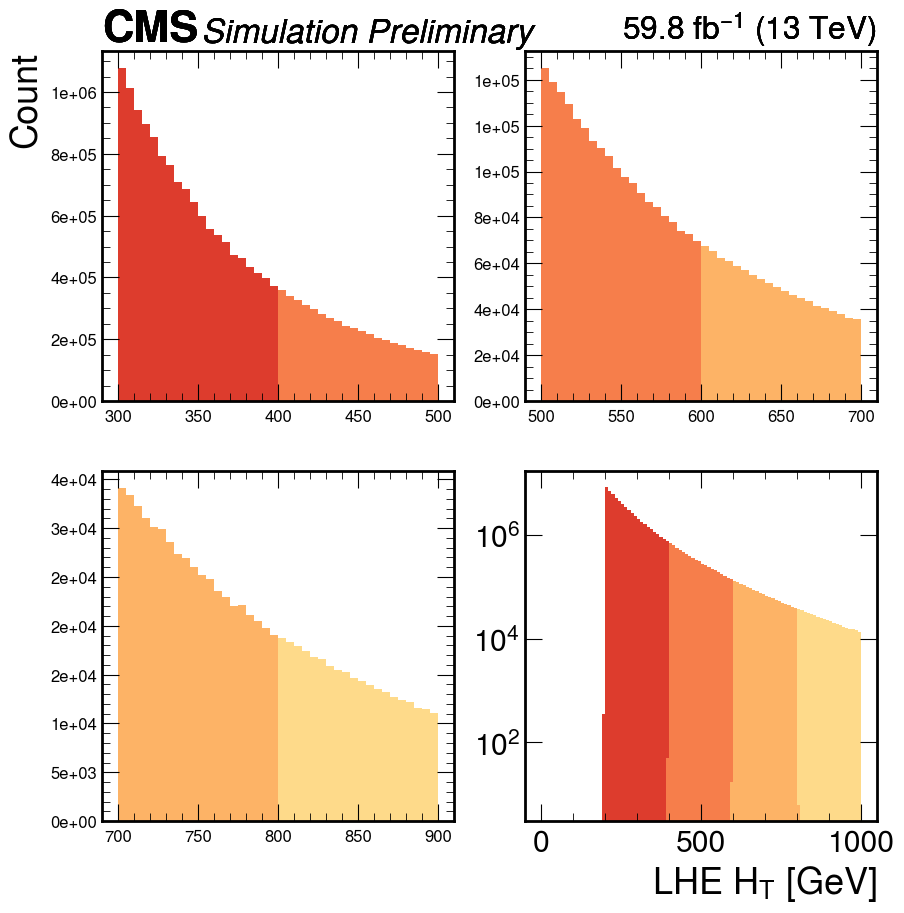

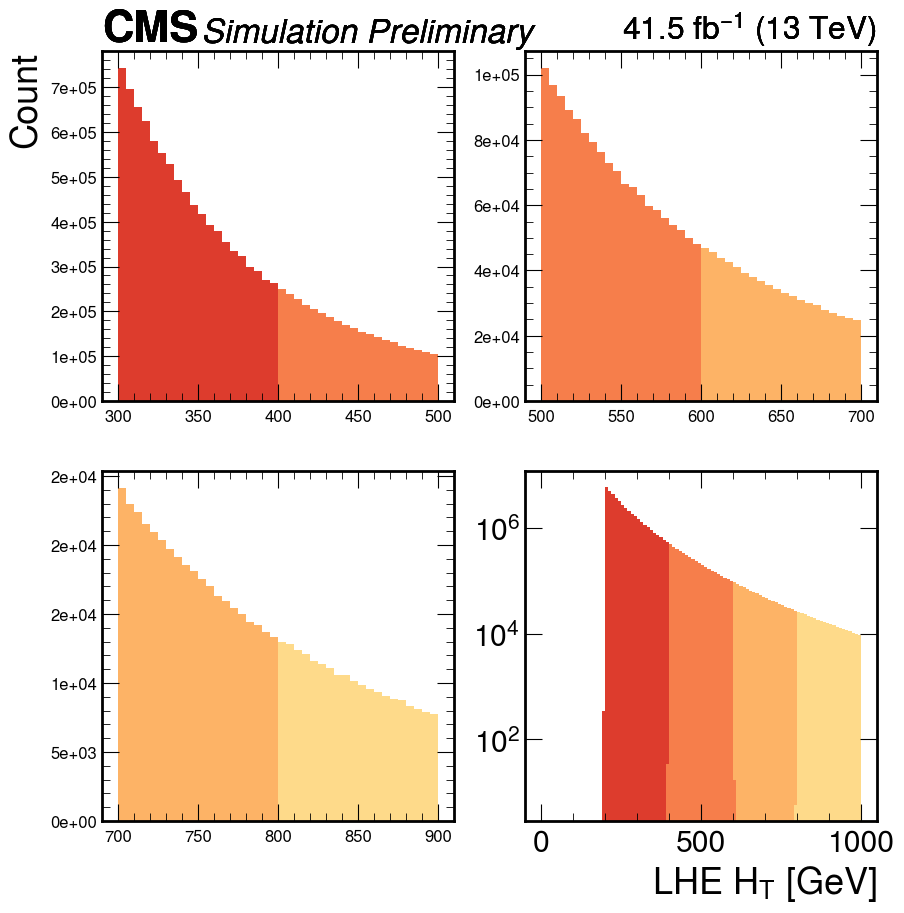

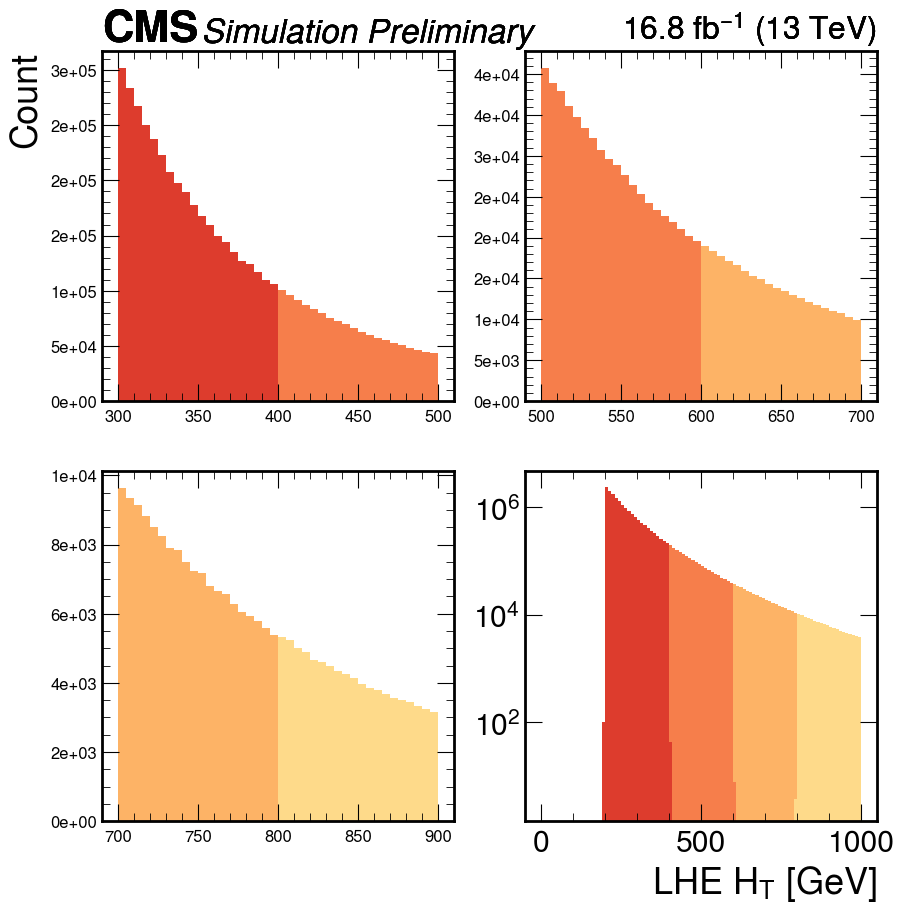

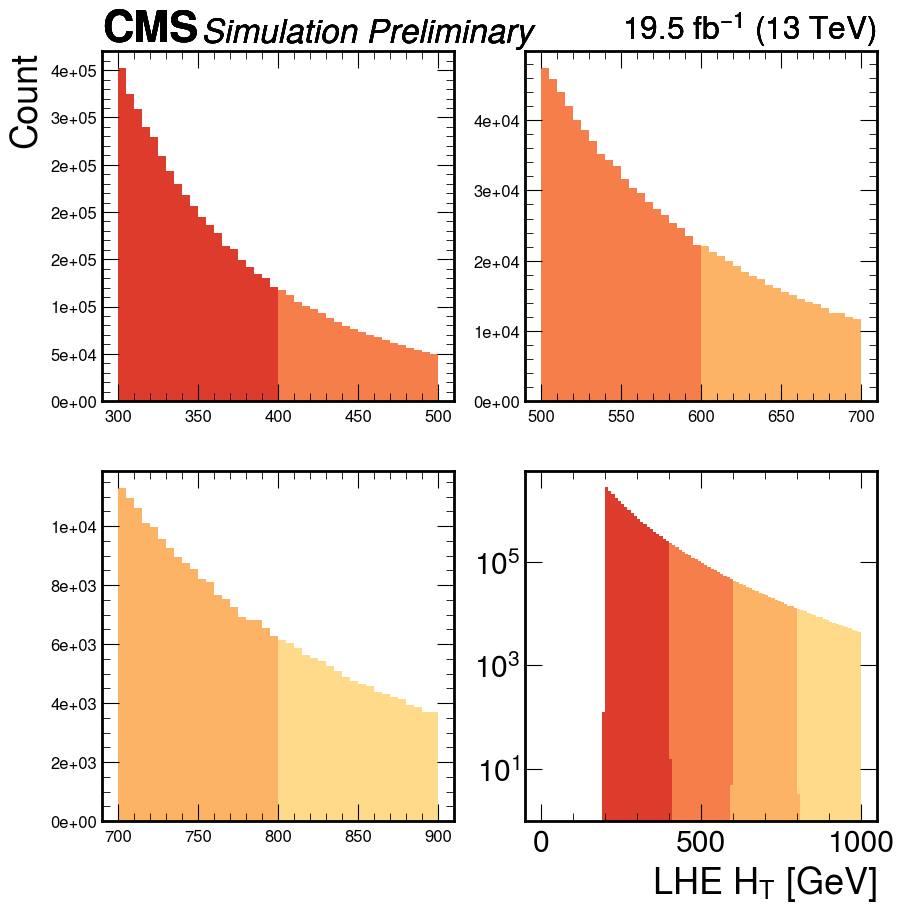

In [4]:
plot_vjets_ht("RunIISummer20UL18NanoAODv9", V="Z")
plot_vjets_ht("RunIISummer20UL17NanoAODv9", V="Z")
plot_vjets_ht("RunIISummer20UL16NanoAODv9", V="Z")
plot_vjets_ht("RunIISummer20UL16NanoAODAPVv9", V="Z")